<a href="https://colab.research.google.com/github/BRCInc-dev/Data-Analysis-Tools/blob/main/Basic_Statistics_B3_(excluding_5).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_excel('Forest Fire Data.xlsx')

In [ ]:
# Conduct basic data analysis
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.describe.html

# Understand data types, basic statistics, and ranges
df.head()

,Coordinate X,Coordinate Y,month,day,FFMC,DMC,DC,ISI,Temperature (C),Humidity (%),Wind (km/h),Rain (mm/m2),Area burnt (ha)
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


In [ ]:
print(df.to_string())

In [ ]:
df.dtypes

,0
Coordinate X,int64
Coordinate Y,int64
month,object
day,object
FFMC,float64
DMC,float64
DC,float64
ISI,float64
Temperature (C),float64
Humidity (%),int64


In [ ]:
df.nunique()

,0
Coordinate X,9
Coordinate Y,7
month,12
day,7
FFMC,106
DMC,215
DC,219
ISI,119
Temperature (C),192
Humidity (%),75


In [ ]:
df.isnull().sum()

,0
Coordinate X,0
Coordinate Y,0
month,0
day,0
FFMC,0
DMC,0
DC,0
ISI,0
Temperature (C),0
Humidity (%),0


In [ ]:
df.describe()

,Coordinate X,Coordinate Y,FFMC,DMC,DC,ISI,Temperature (C),Humidity (%),Wind (km/h),Rain (mm/m2),Area burnt (ha)
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,4.669246,4.299807,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292
std,2.313778,1.229900,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818
min,1.000000,2.000000,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000
25%,3.000000,4.000000,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000
50%,4.000000,4.000000,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000
75%,7.000000,5.000000,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000
max,9.000000,9.000000,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000


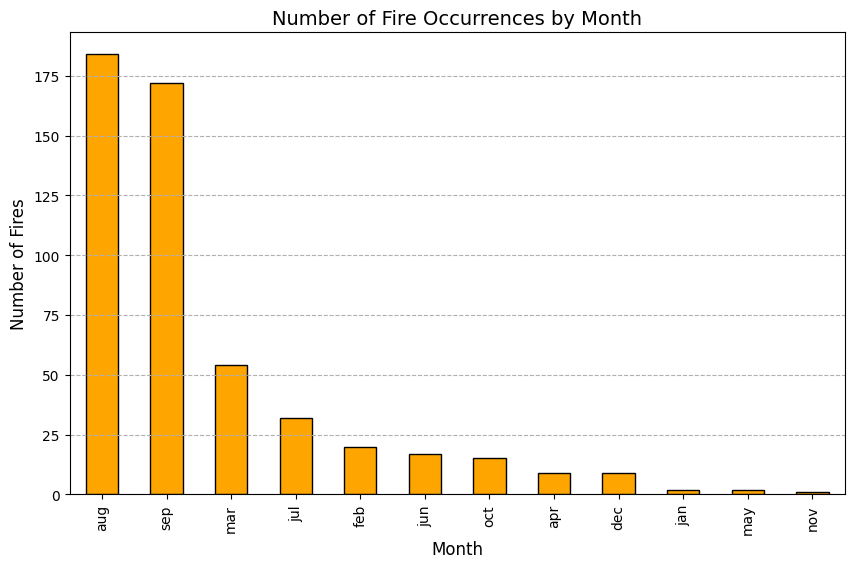

In [ ]:
# Which months have the most fire occurrences, and how do they compare?
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html

# Group data by month and count occurrences
month_counts = df['month'].value_counts().sort_values(ascending=False)

# Plot a bar chart for fire occurrences by month
plt.figure(figsize=(10, 6))
month_counts.plot(kind='bar', color='orange', edgecolor='black')
plt.title('Number of Fire Occurrences by Month', fontsize=14)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Number of Fires', fontsize=12)
plt.grid(axis='y', linestyle='--')
plt.show()

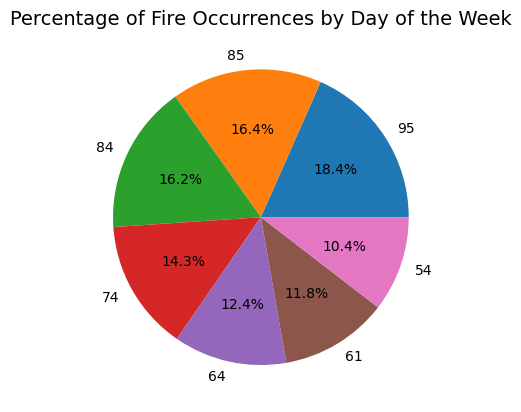

In [ ]:
# On which days of the week are fires most common?
# https://matplotlib.org/stable/gallery/pie_and_polar_charts/pie_features.html

# Group data by day and count occurrences
day_counts = df['day'].value_counts()

# Plot a pie chart for fire occurrences by day of the week, sorted by value
day_counts.plot(kind='pie', labels = day_counts, autopct='%1.1f%%')
plt.title('Percentage of Fire Occurrences by Day of the Week', fontsize=14)
plt.ylabel('')
plt.show()

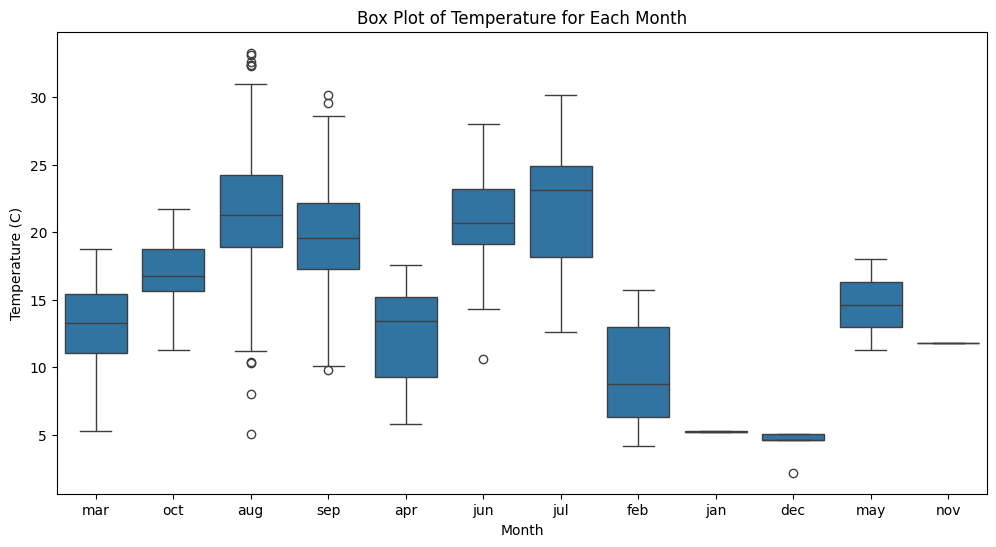

In [ ]:
# Box plot to visualize the distribution of temperature for each month
# https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.boxplot.html

# Create a box plot to visualize the relationship
plt.figure(figsize=(12, 6))
sns.boxplot(x=df['month'], y=df['Temperature (C)'])
plt.title('Box Plot of Temperature for Each Month')
plt.xlabel('Month')
plt.ylabel('Temperature (C)')
plt.show()


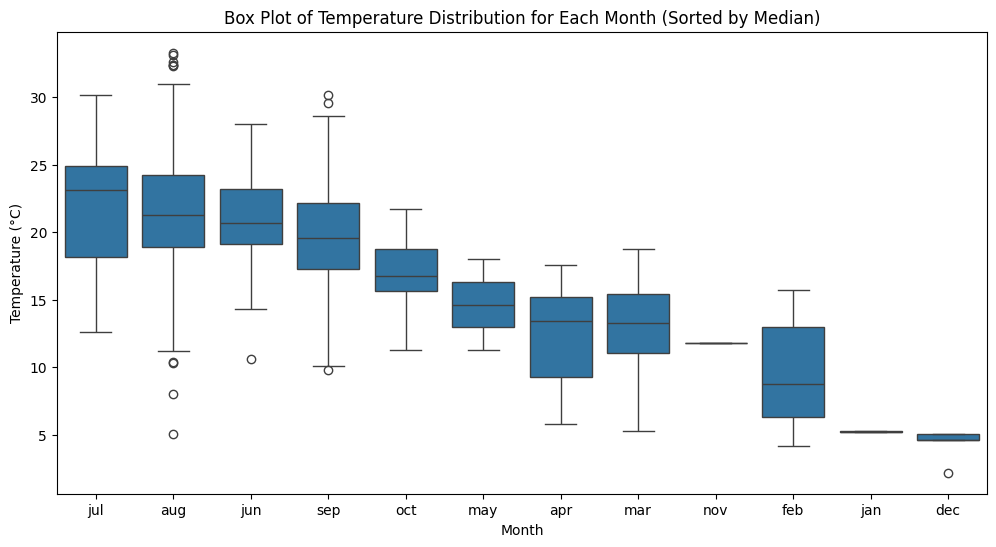

In [ ]:
# Calculate the median temperature for each month
month_medians = df.groupby('month')['Temperature (C)'].median().sort_values(ascending=False)

# Sort the 'month' column according to the median values
sorted_months = month_medians.index

# Box plot to visualize the distribution of temperature for each month, sorted by median
plt.figure(figsize=(12, 6))
sns.boxplot(x=df['month'], y=df['Temperature (C)'], order=sorted_months)
plt.title('Box Plot of Temperature Distribution for Each Month (Sorted by Median)')
plt.xlabel('Month')
plt.ylabel('Temperature (°C)')
plt.show()